In [1]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


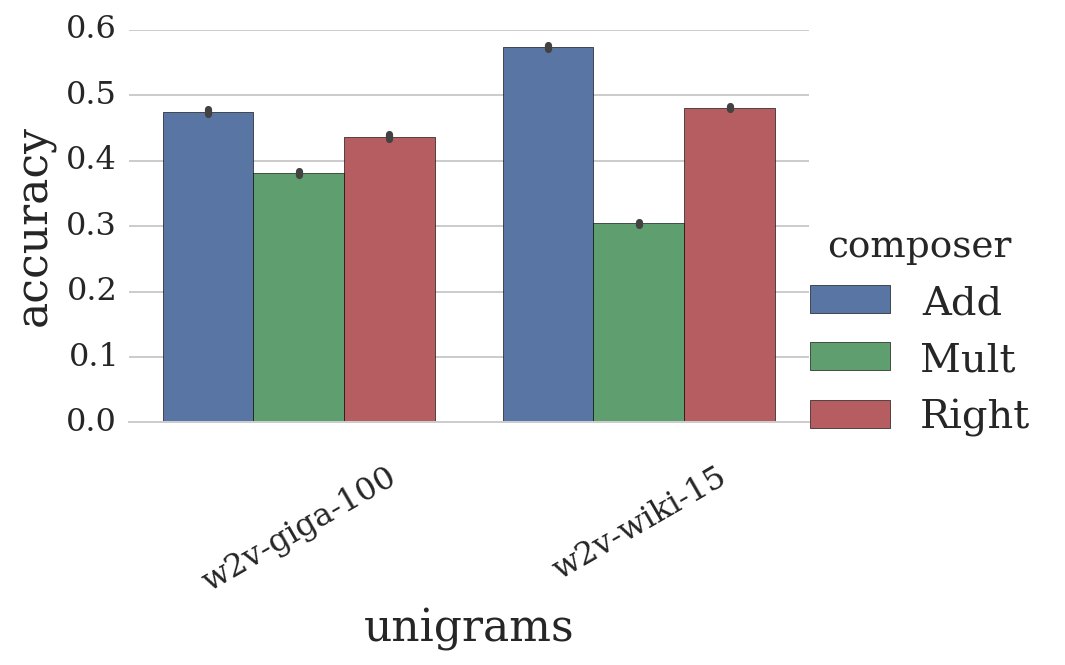

In [6]:
# reported accuracies: Add=50%, Mult=57%, SOTA=81.6 (Turney holistic model)
df_res = pd.read_csv('../thesisgenerator/intrinsic_turney_phraselevel.csv')
g = sns.factorplot(data=df_res, x='unigrams', hue='composer', y='accuracy', kind='bar', aspect=1.5)
g.set_xticklabels(rotation=30);
sns.despine(left=True)
plt.savefig('plot-intrinsic-turney.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

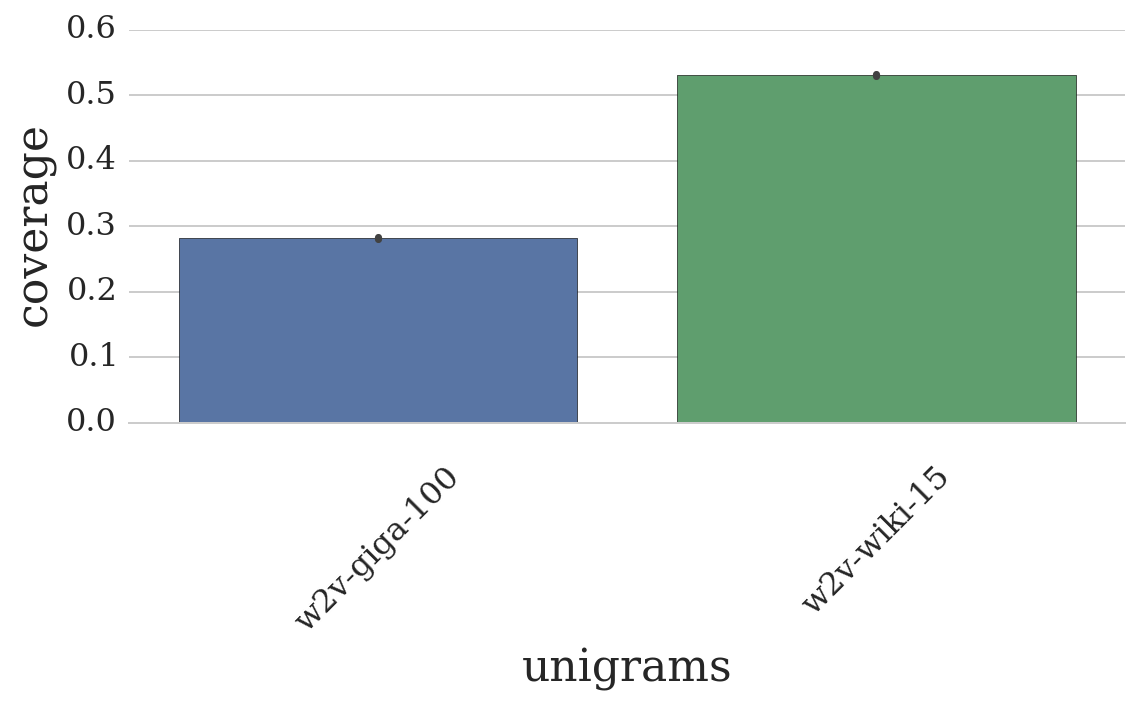

In [8]:
g = sns.factorplot(data=df_res, x='unigrams', y='coverage', kind='bar', aspect=2)
g.set_xticklabels(rotation=45);
sns.despine(left=True)
plt.savefig('plot-intrinsic-turney-coverage.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [64]:
test_phrase = 'bass fiddle'
unigram_source = vv.from_tsv(paths[0])
composer = AdditiveComposer(unigram_source)
pred, scores = predict(test_phrase, list(df.ix[test_phrase].values), composer, unigram_source)
gold = df.ix[test_phrase, 0]
pred, gold, scores

('violin',
 'contrabass',
 defaultdict(<function _maxint at 0x10ad91048>, {'speedway': 3.8477224206890175, 'violin': 2.5607110699209996, 'pitch': 3.017607573653578}))

# Observations
 - the task is messy- many questions cannot be answered by an average native speaker
 - need to count how many times we don't have a vector for the gold unigram- if we don't, we can't return it as a neighbour
  - without it, models attempt >95% of questions; with it only 30%-75%

Task is set up to test if models are skating by on lexical overlap. I am not disallowing it here as it would be slightly unfair, but then the results of this test will not be compatible with my DC results. Should do both versions.

See §4.2 in (Turney, 2012), esp. eq 30/31, table 15 for explanation of how he does the evaluation